<a href="https://colab.research.google.com/github/tlr-id/MIR2023/blob/main/MidProjMIR_Classif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#If not installed, install Essentia. 
# This cell is for running the notebook in Colab
import importlib.util

!pip install pandas

#Basic imports
import os
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

data_file = 'gdrive/MyDrive/Term2/MIR/data_final2.csv'

Mounted at /content/gdrive


In [3]:
#Read data with pandas module
data = pd.read_csv(data_file)

#Plot first lines of our data
data.head()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,spectral_spread.mean,spectral_spread.stdev,spectral_strongpeak.mean,spectral_strongpeak.stdev,zerocrossingrate.mean,zerocrossingrate.stdev,tempo,key,genre,name
0,0.952984,10.383886,5.320251,0.165824,0.083260,15.013739,65.227203,1.809609,2.869135,27.521223,...,5787919.0,3091031.500,0.923417,1.410475,0.081729,0.068772,125,['C minor'],Breaks,861422 Romanto Out Of The Drum - The Guitar (O...
1,0.868439,11.244633,6.109571,0.136697,0.058074,7.064569,16.977741,1.490016,2.221739,31.111561,...,5356187.0,1796113.500,0.899716,1.465459,0.093233,0.054935,134,['C major'],Breaks,328299 The Funk Lab - Prospecting For Life (Or...
2,0.942632,13.783813,6.427521,0.318123,0.162721,48.944767,98.897263,2.582039,4.251930,17.342327,...,3682847.5,2103720.000,0.829503,1.177100,0.070473,0.074905,125,['C# minor'],Breaks,1958231 Sun Nido - Corn Bread (Beans Breaks Mi...
3,0.911096,11.049895,4.945104,0.162068,0.075236,11.527980,54.925579,1.569150,2.700054,39.018661,...,6577456.5,2591630.250,0.283291,0.622774,0.108076,0.081353,125,['B minor'],Breaks,292730 Locomotive - Way Out Here (Original Mix...
4,0.949919,13.050286,5.850940,0.176577,0.076608,30.247463,56.992378,3.613521,3.218473,21.040346,...,5810251.0,1715979.125,0.646823,0.610821,0.059486,0.051478,130,['F minor'],Breaks,299887 DJ Memo - 12345678910 (Fran Egea Remix)...


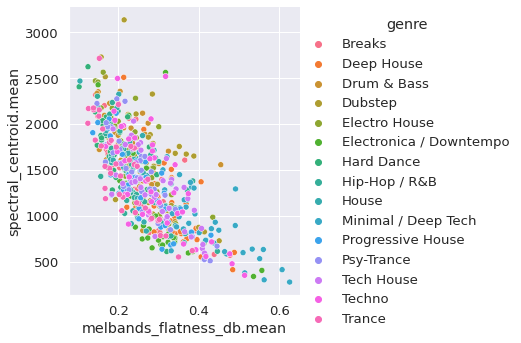

In [34]:
# Take two random features and plot the sample points
import seaborn as sns
sns.relplot(x = "melbands_flatness_db.mean", y = "spectral_centroid.mean", hue = "genre", data = data);

In [5]:
data_modif = data.copy()

#Let's use sklearn's preprocessing tools for applying normalisation to features
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
print()
data_modif.iloc[:,:85] = min_max_scaler.fit_transform(data.iloc[:,:85].values)
# Only values -> including tempo excluding key & genre

# Supervised learning approach (Support Vector Machines)

In [6]:
# Input values put in a matrix, there are 84 features
X = data_modif.iloc[:,:85].values 
# Creating output values
data_modif.genre = pd.Categorical(data_modif.genre)  # convert to categorical data
y = np.array(data_modif.genre.cat.codes)  # create label encoded outputs
# Print the first sample
print("Features of the first sample: ", X[0])
print("Class of the first sample: ", y[0])

Features of the first sample:  [0.96004042 0.16669689 0.50532706 0.20032492 0.30365642 0.05140421
 0.02732551 0.158094   0.27474624 0.49138685 0.43537109 0.81802297
 0.23143084 0.29950661 0.38047378 0.47186239 0.280058   0.24183861
 0.06191876 0.08734003 0.22660972 0.25242782 0.30463145 0.37864904
 0.13516172 0.16269605 0.71122902 0.22486544 0.70933078 0.08798804
 0.72273014 0.10907256 0.21307189 0.50198733 0.22867177 0.35049917
 0.07444121 0.02401255 0.14089067 0.24768658 0.51274165 0.46192594
 0.750145   0.378477   1.         0.         0.95725313 0.40019846
 0.20795216 0.63961604 0.41248934 0.32953835 0.40490557 0.61589901
 0.92651197 0.05824709 0.07698807 0.05587198 0.09688479 0.16080145
 0.05524159 0.06964678 0.45443265 0.3406973  0.21764901 0.44445998
 0.73304898 0.32873966 0.41814775 0.32373171 0.03591359 0.02713086
 0.18105146 0.16307157 0.43379297 0.56031534 0.1547932  0.09423714
 0.503664   0.47391046 0.40247724 0.2528747  0.50992357 0.52243524
 0.66489362]
Class of the first

In [7]:
# Let's split data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Check sizes of input and output vectors
print("Size of train features matrix: ",X_train.shape, ", Size of train output vector: ",y_train.shape)
print("Size of test features matrix: ",X_test.shape, ", Size of test output vector: ",y_test.shape)

Size of train features matrix:  (412, 85) , Size of train output vector:  (412,)
Size of test features matrix:  (203, 85) , Size of test output vector:  (203,)


In [8]:
# Define and train the model

from sklearn import svm
print(X_train.shape[-1]) # 86 ; makes sense.
print(X_train[0])
clf = svm.SVC(gamma = 1 / (X_train.shape[-1] * X_train.var()))

# Fit model with training data
clf.fit(X_train, y_train)

# Predict classes of test samples
y_pred = clf.predict(X_test)

85
[0.98197403 0.73514284 0.53274903 0.42730269 0.46747369 0.2350049
 0.16604731 0.50677975 0.62208679 0.24584981 0.33957417 0.65781794
 0.55144306 0.49104116 0.46417805 0.58181364 0.29038804 0.20962724
 0.08619111 0.10947928 0.36810135 0.338174   0.51810887 0.70928981
 0.06760892 0.07223097 0.66610081 0.11206138 0.39775826 1.
 0.59441931 0.71402962 0.697969   0.39699623 0.45009675 0.41813756
 0.3495439  0.05553504 0.49551038 0.53418528 0.15602376 0.14865975
 0.30930582 0.50255651 1.         0.         0.91773704 0.54388923
 0.06758774 0.3802187  0.34036094 0.32004996 0.28222751 0.72188347
 0.86128368 0.05482867 0.13916618 0.05272992 0.04883022 0.04788556
 0.12606589 0.06072547 0.21896336 0.24935316 0.22865098 0.38025454
 0.75152362 0.3271805  0.33538518 0.28586937 0.01356864 0.00997481
 0.29840045 0.1319167  0.11585442 0.27587155 0.08842225 0.06934142
 0.55330142 0.32459819 0.1662429  0.04489528 0.17091209 0.23672897
 0.79787234]


In [9]:
# Test the model
# Let's check for each sample in the test set if prediction matches the true class information
y_test == y_pred

array([ True, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True,  True, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False,

In [10]:
# Data is balanced, so you can use accuracy as a measure:
print("accuracy: ", np.sum(y_test == y_pred)/len(y_test))

accuracy:  0.20689655172413793


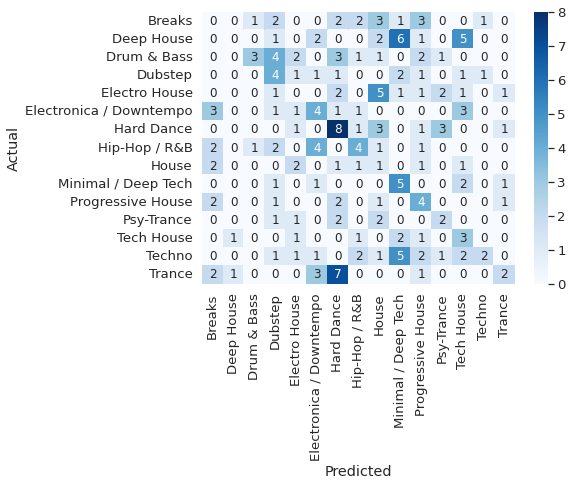

In [11]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = np.unique(data_modif.genre)
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (7, 5))
sns.set(font_scale = 1.2)
sns.heatmap(conf_mat, cmap = "Blues", annot_kws = {"size": 12}, annot = True);

# Supervised learning approach (Neural Network)

In [12]:
from sklearn.preprocessing import StandardScaler

# Let's start by splitting our data 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

# ..and apply normalisation
scaler = StandardScaler().fit(X_train_val)
norm_x_train_val = scaler.transform(X_train_val)
norm_x_test = scaler.transform(X_test)

In [13]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
y_train_val_onehot = onehot_encoder.fit_transform(y_train_val.reshape(len(y_train_val), 1))
y_test_onehot = onehot_encoder.fit_transform(y_test.reshape(len(y_test), 1))
print("One-hot encoded y_train_val shape = ", y_train_val_onehot.shape)
print("One-hot encoded y_test shape = ", y_test_onehot.shape)

One-hot encoded y_train_val shape =  (492, 15)
One-hot encoded y_test shape =  (123, 15)


In [14]:
from keras.models import Sequential
from keras import layers

def compose_model(num_features):
    
    model = Sequential()

    # Input layer 
    model.add(layers.BatchNormalization(name='InputLayer', input_shape=(num_features,)))
    
    # 1. hidden layer
    model.add(layers.Dense(name='HiddenLayer_1', units = 40))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('tanh'))
    model.add(layers.Dropout(0.3))

    # 2. hidden layer
    model.add(layers.Dense(name='HiddenLayer_2', units = 20))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.3))

    # Output layer
    model.add(layers.Dense(name='Output_layer', units = 15))
    model.add(layers.Activation('sigmoid'))
    
    return model

model = compose_model(X_train_val.shape[1])

In [15]:
model.summary()  # Plot summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (BatchNormalizat  (None, 85)               340       
 ion)                                                            
                                                                 
 HiddenLayer_1 (Dense)       (None, 40)                3440      
                                                                 
 batch_normalization (BatchN  (None, 40)               160       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 40)                0         
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 HiddenLayer_2 (Dense)       (None, 20)                8

In [16]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
summary = model.fit(X_train_val, y_train_val_onehot, batch_size = 50, epochs = 250, validation_split=0.2, verbose=0)

In [17]:
score = model.evaluate(X_test, y_test_onehot, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21817544102668762
Test accuracy: 0.27642276883125305


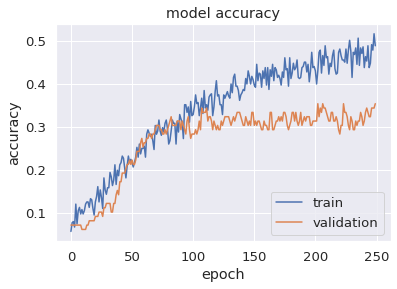

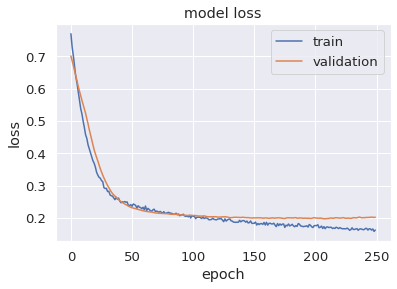

In [18]:
# summarize history for accuracy
plt.plot(summary.history['accuracy'])
plt.plot(summary.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(summary.history['loss'])
plt.plot(summary.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# From Sound Classif notebook

In [19]:
# We'll need numpy and pandas for basic data wrangling
import numpy as np
import pandas as pd

# We'll need matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# We'll use some preprocessing from scikit-learn:
#  Standard scaling (z-scoring) and label encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Our classifier will be 1-nearest-neighbor after learning the distance metric
from sklearn.neighbors import KNeighborsClassifier

# Pipelines make it a little easier to manage sequences of models,
# eg scaler -> metric learner -> 1nn
from sklearn.pipeline import make_pipeline

# We'll use some standard machinery for reporting accuracy of our models
from sklearn.metrics import classification_report,  plot_confusion_matrix

from sklearn.model_selection import train_test_split


RNG_STATE = 0

from google.colab import files


In [20]:
# Input values put in a matrix, there are 84 features
X = data_modif.iloc[:,:85].values 
# Creating output values
data_modif.genre = pd.Categorical(data_modif.genre)  # convert to categorical data
y = np.array(data_modif.genre.cat.codes)  # create label encoded outputs
# Print the first sample
print("Features of the first sample: ", X[0])
print("Class of the first sample: ", y[0])

Features of the first sample:  [0.96004042 0.16669689 0.50532706 0.20032492 0.30365642 0.05140421
 0.02732551 0.158094   0.27474624 0.49138685 0.43537109 0.81802297
 0.23143084 0.29950661 0.38047378 0.47186239 0.280058   0.24183861
 0.06191876 0.08734003 0.22660972 0.25242782 0.30463145 0.37864904
 0.13516172 0.16269605 0.71122902 0.22486544 0.70933078 0.08798804
 0.72273014 0.10907256 0.21307189 0.50198733 0.22867177 0.35049917
 0.07444121 0.02401255 0.14089067 0.24768658 0.51274165 0.46192594
 0.750145   0.378477   1.         0.         0.95725313 0.40019846
 0.20795216 0.63961604 0.41248934 0.32953835 0.40490557 0.61589901
 0.92651197 0.05824709 0.07698807 0.05587198 0.09688479 0.16080145
 0.05524159 0.06964678 0.45443265 0.3406973  0.21764901 0.44445998
 0.73304898 0.32873966 0.41814775 0.32373171 0.03591359 0.02713086
 0.18105146 0.16307157 0.43379297 0.56031534 0.1547932  0.09423714
 0.503664   0.47391046 0.40247724 0.2528747  0.50992357 0.52243524
 0.66489362]
Class of the first

In [21]:
# Let's split data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = RNG_STATE)

# Check sizes of input and output vectors
print("Size of train features matrix: ",X_train.shape, ", Size of train output vector: ",y_train.shape)
print("Size of test features matrix: ",X_test.shape, ", Size of test output vector: ",y_test.shape)

Size of train features matrix:  (492, 85) , Size of train output vector:  (492,)
Size of test features matrix:  (123, 85) , Size of test output vector:  (123,)


In [22]:
# Our classifier is a "pipeline": scaling followed by KNN
clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))

# Fit all stages of the pipeline to our training data
clf.fit(X_train, y=y_train)

# How well does our 1-Nearest neighbor model work?
y_pred = clf.predict(X_test)


In [23]:
# Test the model
# Let's check for each sample in the test set if prediction matches the true class information
y_test == y_pred
# Data is balanced, so you can use accuracy as a measure:
print("accuracy: ", np.sum(y_test == y_pred)/len(y_test))

accuracy:  0.17073170731707318


                         precision    recall  f1-score   support

                 Breaks       0.29      0.17      0.21        12
             Deep House       0.20      0.08      0.12        12
            Drum & Bass       0.67      0.50      0.57         4
                Dubstep       0.18      0.50      0.27         4
          Electro House       0.25      0.11      0.15         9
Electronica / Downtempo       0.22      0.25      0.24         8
             Hard Dance       0.23      0.33      0.27         9
          Hip-Hop / R&B       0.44      0.80      0.57         5
                  House       0.12      0.08      0.10        12
    Minimal / Deep Tech       0.33      0.08      0.13        12
      Progressive House       0.09      0.17      0.12         6
             Psy-Trance       0.00      0.00      0.00         7
             Tech House       0.07      0.12      0.09         8
                 Techno       0.00      0.00      0.00         7
                 Trance 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


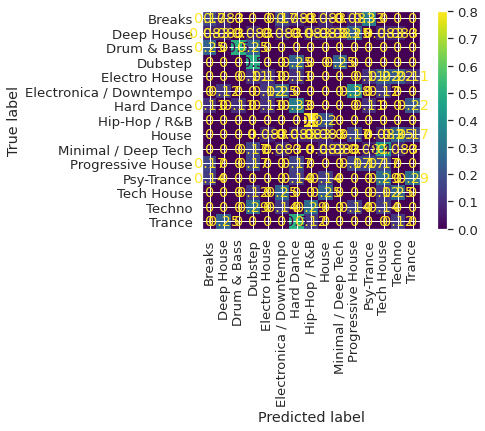

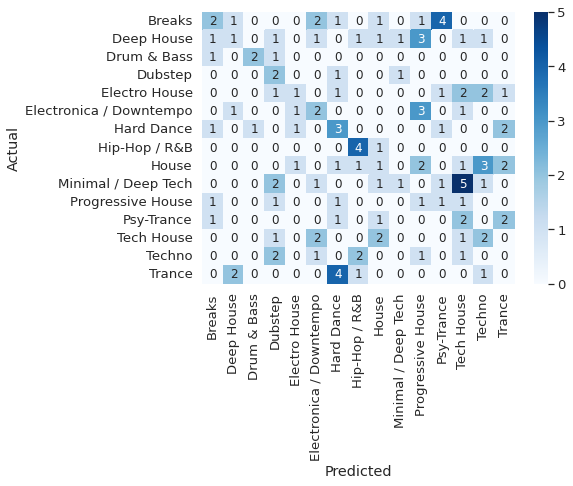

In [24]:
# Compare our predictions to the true labels in y_test

classes = np.unique(data_modif.genre)
report = classification_report(y_test, y_pred, target_names=classes)

print(report)

# Finally, plot a confusion matrix showing how mistakes are distributed
plot_confusion_matrix(clf, X_test, y_test, display_labels=classes, xticks_rotation='vertical', normalize='true');

conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (7, 5))
sns.set(font_scale = 1.2)
sns.heatmap(conf_mat, cmap = "Blues", annot_kws = {"size": 12}, annot = True);

# Feature Visualization

In [25]:
### How to visualize features using metric learning https://github.com/bmcfee/ismir2020-metric-learning
# scikit-learn provides Linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Finally, umap will let us map high-dimensional data down to 2-d for plotting
!pip install umap-learn
import umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=b28ce2efc70eaf2de9d67bb3df475e44363baffe7d75a10fe23200b3f2a9ab24
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=6776b534ba3ab88a05abf3d76c7608eb6a6b21a0b533aec2d47c65d99a365db4
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [26]:
reducer = umap.UMAP(random_state=RNG_STATE)

# We'll apply all but the last stage (KNN classifier) of our pipeline to the data.
# In this case, we just have one previous stage, which does feature normalization.
# This will change in subsequent examples.

X_train_transformed = clf[:-1].transform(X_train)
X_test_transformed = clf[:-1].transform(X_test)

# Fit on the transformed data, and then transform the test data
embed = reducer.fit_transform(X_train_transformed)
embed_test = reducer.transform(X_test_transformed)

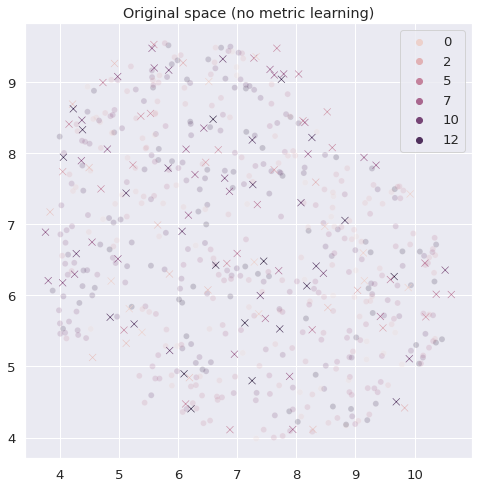

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=embed[:, 0], y=embed[:, 1], hue=y_train, marker='o', alpha=0.2, legend=None, ax=ax)
sns.scatterplot(x=embed_test[:, 0], y=embed_test[:, 1], hue=y_test, marker='x', s=50, alpha=1, legend='brief', ax=ax)
ax.legend(bbox_to_anchor=(1, 1));
ax.set(title='Original space (no metric learning)');

# Linear projection of features

[Pipeline] .... (step 1 of 3) Processing standardscaler, total=   0.0s
[Pipeline]  (step 2 of 3) Processing lineardiscriminantanalysis, total=   0.1s
[Pipeline]  (step 3 of 3) Processing kneighborsclassifier, total=   0.0s
                         precision    recall  f1-score   support

                 Breaks       0.22      0.17      0.19        12
             Deep House       0.14      0.08      0.11        12
            Drum & Bass       0.25      0.25      0.25         4
                Dubstep       0.00      0.00      0.00         4
          Electro House       0.25      0.22      0.24         9
Electronica / Downtempo       0.25      0.25      0.25         8
             Hard Dance       0.56      0.56      0.56         9
          Hip-Hop / R&B       0.27      0.60      0.37         5
                  House       0.00      0.00      0.00        12
    Minimal / Deep Tech       0.60      0.25      0.35        12
      Progressive House       0.00      0.00      0.00       

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


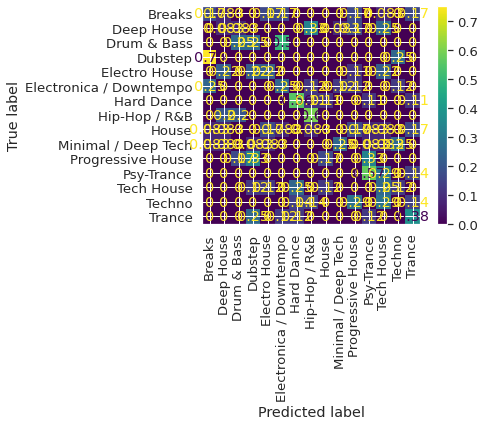

In [28]:
clf = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(), KNeighborsClassifier(n_neighbors=1), verbose=True)
clf.fit(X_train, y=y_train)

y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred, target_names=classes)

print(report)

plot_confusion_matrix(clf, X_test, y_test, display_labels=classes, xticks_rotation='vertical', normalize='true')


In [29]:
reducer = umap.UMAP(random_state=RNG_STATE)

# We'll fit the umap embedding on the data after applying our learned transformation
embed = reducer.fit_transform(clf[:-1].transform(X_train))
embed_test = reducer.transform(clf[:-1].transform(X_test))

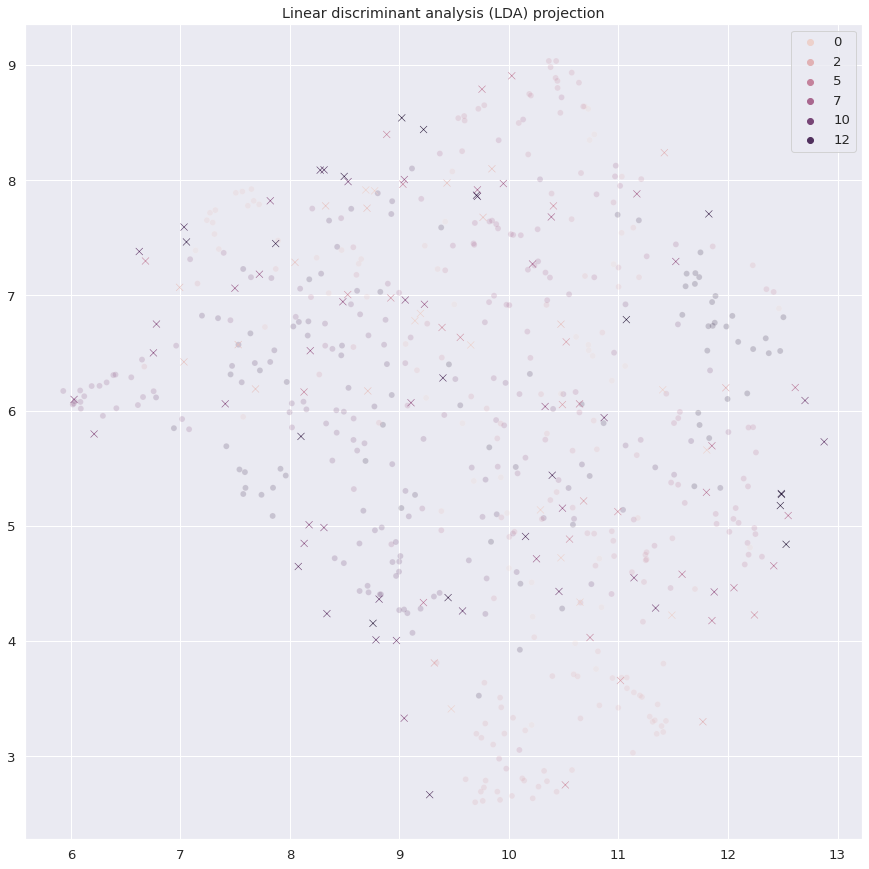

In [30]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.scatterplot(x=embed[:, 0], y=embed[:, 1], hue=y_train, marker='o', alpha=0.2, legend=None, ax=ax)
sns.scatterplot(x=embed_test[:, 0], y=embed_test[:, 1], hue=y_test, marker='x', s=50, alpha=1, legend='brief', ax=ax)
ax.legend(bbox_to_anchor=(1, 1));
ax.set(title='Linear discriminant analysis (LDA) projection');

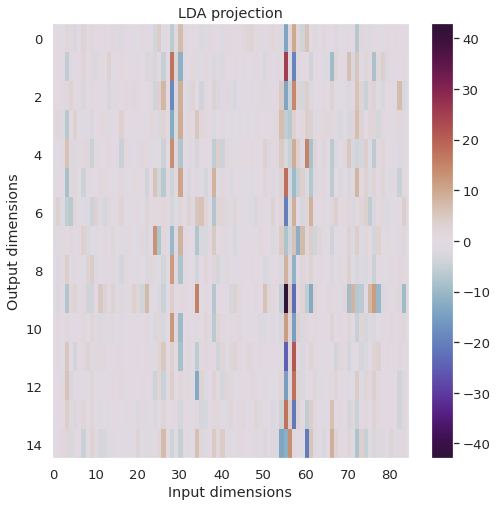

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))
model = clf.steps[1][1]
weights = model.coef_

img = ax.imshow(weights, cmap='twilight_shifted', vmin=-np.abs(weights).max(), vmax=np.abs(weights).max(), aspect='auto', interpolation='none')
fig.colorbar(img, ax=ax)
ax.grid(False)
ax.set(xlabel='Input dimensions', ylabel='Output dimensions', title='LDA projection');

In [32]:
print(weights.shape)

for i in range(len(weights)):
  #print(data.columns)
  #print(data.columns[:-1][weights[0]>100])
  print(data.columns[:85][weights[i]>100])

(15, 85)
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
